# **Blue Car Hypothesis Test**

Is the mean of Blue Cars returned less than Blue cars taken?

Given that blue cars returned = A and blue cars taken = B, then our hypothesis will be:

*  Null hypothesis:  H0: Mean of A = Mean of B
*  Alternative hypothesis: H1: Mean of A < Mean of B

## 1.Loading Libraries and The Dataset.

In [16]:
# Import libraries
#
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
# Loading your dataset
#
Autolib = pd.read_csv('autolib_daily_events_postal_code.csv', delimiter = ',')
Autolib

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16080,95880,6/15/2018,1440,4,weekday,15,10,0,0,2,3,0,0
16081,95880,6/16/2018,1440,5,weekend,19,19,0,0,2,1,0,0
16082,95880,6/17/2018,1440,6,weekend,33,35,1,1,0,0,0,0
16083,95880,6/18/2018,1440,0,weekday,11,14,3,5,2,2,0,0


In [18]:
# Columns explanation
#
Columns = pd.read_excel('columns_explanation.xlsx')
Columns

,Column name,explanation
0,Postal code,postal code of the area (in Paris)
1,date,date of the row aggregation
2,n_daily_data_points,number of daily data poinst that were availabl...
3,dayOfWeek,identifier of weekday (0: Monday -> 6: Sunday)
4,day_type,weekday or weekend
5,BlueCars_taken_sum,Number of bluecars taken that date in that area
6,BlueCars_returned_sum,Number of bluecars returned that date in that ...
7,Utilib_taken_sum,Number of Utilib taken that date in that area
8,Utilib_returned_sum,Number of Utilib returned that date in that area
9,Utilib_14_taken_sum,Number of Utilib 1.4 taken that date in that area


## 2.Checking The Data.

In [19]:
# Checking the number of records in the dataset
#
Autolib.count()

Postal code               16085
date                      16085
n_daily_data_points       16085
dayOfWeek                 16085
day_type                  16085
BlueCars_taken_sum        16085
BlueCars_returned_sum     16085
Utilib_taken_sum          16085
Utilib_returned_sum       16085
Utilib_14_taken_sum       16085
Utilib_14_returned_sum    16085
Slots_freed_sum           16085
Slots_taken_sum           16085
dtype: int64

In [20]:
# Previewing the top of our dataset
#
Autolib.head()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


In [21]:
# Previewing the bottom of our dataset
#
Autolib.tail()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
16080,95880,6/15/2018,1440,4,weekday,15,10,0,0,2,3,0,0
16081,95880,6/16/2018,1440,5,weekend,19,19,0,0,2,1,0,0
16082,95880,6/17/2018,1440,6,weekend,33,35,1,1,0,0,0,0
16083,95880,6/18/2018,1440,0,weekday,11,14,3,5,2,2,0,0
16084,95880,6/19/2018,1370,1,weekday,2,2,2,1,0,0,0,0


In [22]:
# Checking whether each column has an appropriate datatype
#
Autolib.dtypes

Postal code                int64
date                      object
n_daily_data_points        int64
dayOfWeek                  int64
day_type                  object
BlueCars_taken_sum         int64
BlueCars_returned_sum      int64
Utilib_taken_sum           int64
Utilib_returned_sum        int64
Utilib_14_taken_sum        int64
Utilib_14_returned_sum     int64
Slots_freed_sum            int64
Slots_taken_sum            int64
dtype: object

In [23]:
# Describe our data
#
Autolib.describe()

,Postal code,n_daily_data_points,dayOfWeek,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
count,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000
mean,88791.293876,1431.330619,2.969599,125.926951,125.912714,3.698290,3.699099,8.600560,8.599192,22.629033,22.629282
std,7647.342000,33.212050,2.008378,185.426579,185.501535,5.815058,5.824634,12.870098,12.868993,52.120263,52.146030
min,75001.000000,1174.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,91330.000000,1439.000000,1.000000,20.000000,20.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
50%,92340.000000,1440.000000,3.000000,46.000000,46.000000,1.000000,1.000000,3.000000,3.000000,0.000000,0.000000
75%,93400.000000,1440.000000,5.000000,135.000000,135.000000,4.000000,4.000000,10.000000,10.000000,5.000000,5.000000
max,95880.000000,1440.000000,6.000000,1352.000000,1332.000000,54.000000,58.000000,100.000000,101.000000,360.000000,359.000000


## 3.Data Cleaning.

In [24]:
# Drop unnecessary columns since
# only data from blue cars is needed.
#
Autolib.drop(columns=['Utilib_taken_sum', 'Utilib_returned_sum', 'Utilib_14_taken_sum', 'Utilib_14_returned_sum', 'Slots_freed_sum', 'Slots_taken_sum'], axis=1, inplace=True)
Autolib

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum
0,75001,1/1/2018,1440,0,weekday,110,103
1,75001,1/2/2018,1438,1,weekday,98,94
2,75001,1/3/2018,1439,2,weekday,138,139
3,75001,1/4/2018,1320,3,weekday,104,104
4,75001,1/5/2018,1440,4,weekday,114,117
...,...,...,...,...,...,...,...
16080,95880,6/15/2018,1440,4,weekday,15,10
16081,95880,6/16/2018,1440,5,weekend,19,19
16082,95880,6/17/2018,1440,6,weekend,33,35
16083,95880,6/18/2018,1440,0,weekday,11,14


In [25]:
# Check for missing data
#
Autolib.isnull().sum()

Postal code              0
date                     0
n_daily_data_points      0
dayOfWeek                0
day_type                 0
BlueCars_taken_sum       0
BlueCars_returned_sum    0
dtype: int64

In [26]:
# Remove duplicates
#
Autolib.drop_duplicates()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum
0,75001,1/1/2018,1440,0,weekday,110,103
1,75001,1/2/2018,1438,1,weekday,98,94
2,75001,1/3/2018,1439,2,weekday,138,139
3,75001,1/4/2018,1320,3,weekday,104,104
4,75001,1/5/2018,1440,4,weekday,114,117
...,...,...,...,...,...,...,...
16080,95880,6/15/2018,1440,4,weekday,15,10
16081,95880,6/16/2018,1440,5,weekend,19,19
16082,95880,6/17/2018,1440,6,weekend,33,35
16083,95880,6/18/2018,1440,0,weekday,11,14


In [27]:
# select rows with weekends only from day type.
#
Autolib_ = Autolib.loc[(Autolib['day_type']=='weekend')&(Autolib['Postal code']==75001)]
Autolib_

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum
5,75001,1/6/2018,1437,5,weekend,187,185
6,75001,1/7/2018,1440,6,weekend,180,180
12,75001,1/13/2018,1440,5,weekend,224,223
13,75001,1/14/2018,1440,6,weekend,193,193
19,75001,1/20/2018,1439,5,weekend,217,217
20,75001,1/21/2018,1440,6,weekend,143,150
26,75001,1/27/2018,1440,5,weekend,216,218
27,75001,1/28/2018,1440,6,weekend,190,189
33,75001,2/3/2018,1438,5,weekend,199,204
34,75001,2/4/2018,1440,6,weekend,186,180


## 4.Data Analysis.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


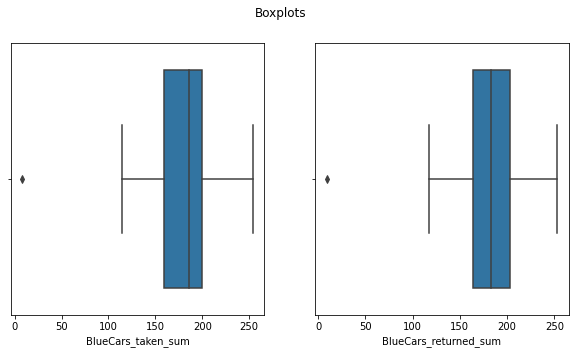

In [28]:
# Check for outliers
#
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10, 5))
fig.suptitle('Boxplots')
sns.boxplot(Autolib_['BlueCars_taken_sum'], ax=ax1)
sns.boxplot(Autolib_['BlueCars_returned_sum'], ax=ax2)
plt.show()

In [42]:
# Remove outliers
#

q1_taken, q3_taken = np.percentile(Autolib_['BlueCars_taken_sum'], [25, 75]) 

iqr1 = q3_taken - q1_taken

l_bound1 = q1_taken - (1.5 * iqr1)
u_bound1 = q3_taken + (1.5 * iqr1)

l_bound1, u_bound1


(99.75, 259.75)

In [43]:
q1_returned, q3_returned = np.percentile(Autolib_['BlueCars_returned_sum'], [25, 75]) 

iqr2 = q3_returned - q1_returned

l_bound2 = q1_returned - (1.5 * iqr2)
u_bound2 = q3_returned + (1.5 * iqr2)

l_bound2, u_bound2

(103.875, 262.875)

In [ ]:
Autolib_1 = Autolib_[(Autolib_.BlueCars_taken_sum>l_bound1)&(Autolib_.BlueCars_taken_sum<u_bound1)]
Autolib_1

In [47]:
Autolib1 = Autolib_1[(Autolib_1.BlueCars_returned_sum>l_bound2)&(Autolib_1.BlueCars_returned_sum<u_bound2)]
Autolib1

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum
5,75001,1/6/2018,1437,5,weekend,187,185
6,75001,1/7/2018,1440,6,weekend,180,180
12,75001,1/13/2018,1440,5,weekend,224,223
13,75001,1/14/2018,1440,6,weekend,193,193
19,75001,1/20/2018,1439,5,weekend,217,217
20,75001,1/21/2018,1440,6,weekend,143,150
26,75001,1/27/2018,1440,5,weekend,216,218
27,75001,1/28/2018,1440,6,weekend,190,189
33,75001,2/3/2018,1438,5,weekend,199,204
34,75001,2/4/2018,1440,6,weekend,186,180


In [48]:
Autolib1.count()

Postal code              43
date                     43
n_daily_data_points      43
dayOfWeek                43
day_type                 43
BlueCars_taken_sum       43
BlueCars_returned_sum    43
dtype: int64

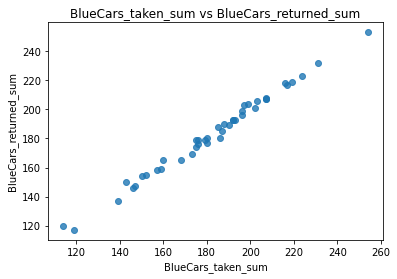

In [52]:
# Check for any correlation using a scatter plot
#

sns.regplot(x = Autolib1["BlueCars_taken_sum"], y = Autolib1["BlueCars_returned_sum"], fit_reg=False)

plt.title('BlueCars_taken_sum vs BlueCars_returned_sum')

plt.xlabel('BlueCars_taken_sum')

plt.ylabel('BlueCars_returned_sum')

plt.show()

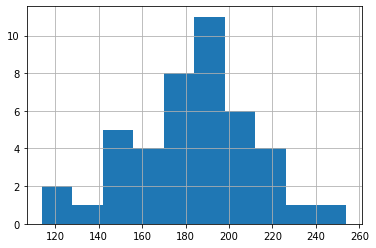

In [57]:
# Check whether the data being tested is normally distributed
#
Autolib1['BlueCars_taken_sum'].hist()

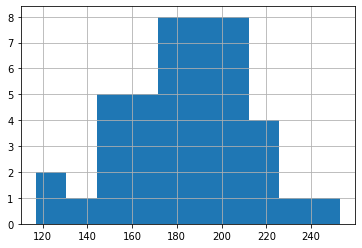

In [58]:
Autolib1['BlueCars_returned_sum'].hist()

In [70]:
# Testing for kurtosis and skweness
#
Skew_ret = Autolib1['BlueCars_returned_sum'].skew()
Kurt_ret = Autolib1['BlueCars_returned_sum'].kurt()
Skew_tak = Autolib1['BlueCars_taken_sum'].skew()
Kurt_tak = Autolib1['BlueCars_taken_sum'].kurt()
print(Skew_ret, Kurt_ret , Skew_tak, Kurt_tak)


-0.17572209106842654 0.15209392251214116 -0.19197768557732836 0.2566378367089426


The shape both histograms take shows that the data is normally distributed. The skewness and kurtosis of both is fairly symmetrical.

## 5.Implementing The Solution.

In [50]:
# select a random sample of n=12 
#
Autolib_samp = Autolib1.sample(n=12)
Autolib_samp

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum
131,75001,5/26/2018,1440,5,weekend,202,201
138,75001,6/2/2018,1440,5,weekend,254,253
59,75001,3/4/2018,1440,6,weekend,168,165
93,75001,4/7/2018,1318,5,weekend,231,232
146,75001,6/10/2018,1440,6,weekend,146,146
27,75001,1/28/2018,1440,6,weekend,190,189
65,75001,3/10/2018,1440,5,weekend,207,208
107,75001,4/21/2018,1440,5,weekend,188,190
6,75001,1/7/2018,1440,6,weekend,180,180
145,75001,6/9/2018,1440,5,weekend,185,188


In [65]:
# point estimate mean for the sample
#
MeanA = Autolib_samp['BlueCars_returned_sum'].mean()
print(MeanA)
MeanB = Autolib_samp['BlueCars_taken_sum'].mean()
print(MeanB)

192.16666666666666
191.58333333333334


In [62]:
# Paired ttest, where alpha=a
a = 0.05

A = Autolib_samp['BlueCars_returned_sum']
B = Autolib_samp['BlueCars_taken_sum']
t_statistic, p_value = stats.ttest_rel(A, B)

if p_value > a:
  print(f'P-value: {p_value} > alpha: {a}, fail to reject H0')
elif p_value < a:
  print(f'P-value: {p_value} < alpha: {a}, reject H0')

P-value: 0.31723436226636165 > alpha: 0.05, fail to reject H0


In [68]:
# Get confidence interval
#
a = 0.05
A = Autolib_samp['BlueCars_returned_sum']
B = Autolib_samp['BlueCars_taken_sum']
MeanD = np.mean(A - B)
stdD = np.std(A - B)
n = 12
df = (n - 1)
t = stats.t.ppf(1 - a, df)
lower = (MeanD - t * stdD) / (np.sqrt(n))
upper = (MeanD + t * stdD) / (np.sqrt(n))
print(lower, upper)

-0.7889046225222577 1.1256922795495394


## 6.Conclusion.

There is substancial evidence which shows that the number of Blue cars returned may not be less than the number of the ones taken.